In [2]:
import numpy as np
from PIL import Image
import skimage
import os

In [38]:
#FUNCTIONS

def resize(file_name):
    orig_image=Image.open(file_name)
    dimension=512
    height=orig_image.size[0]
    width=orig_image.size[1]
    image=orig_image.resize([dimension,dimension])
    no_of_blocks=(dimension*dimension)/(8*8)
    max_limit=(no_of_blocks)**(1/2)
    array=np.asarray(image)
    return array, max_limit, dimension, height, width, orig_image

def init_matrix(x,y):
    list_name=[]
    for i in range(0,x):
        list_name.append([])
        for j in range(0,y):
            list_name[i].append([])
    return list_name

def separate_components(x,y,k,array,list_name):
    for i in range(0,x):
        for j in range(0,y):
            list_name[i][j]=array[i][j][k]
    return list_name

def list2array(list_name):
    array=np.asarray(list_name)
    return array

def create_blocks(array):
    blocks=skimage.util.view_as_blocks(array, block_shape=(8,8))
    return blocks

def transform_matrix():
    B = [[0.35355, 0.35355, 0.50000, 0.00000, 0.70711, 0.00000, 0.00000, 0.00000],
         [0.35355, 0.35355, 0.50000, 0.00000, -0.70711, 0.00000, 0.00000, 0.00000],
         [0.35355, 0.35355, -0.50000, 0.00000, 0.00000, 0.70711, 0.00000, 0.00000],
         [0.35355, 0.35355, -0.50000, 0.00000, 0.00000, -0.70711, 0.00000, 0.00000],
         [0.35355, -0.35355, 0.00000, 0.50000, 0.00000, 0.00000, 0.70711, 0.00000],
         [0.35355, -0.35355, 0.00000, 0.50000, 0.00000, 0.00000, -0.70711, 0.00000],
         [0.35355, -0.35355, 0.00000, -0.50000, 0.00000, 0.00000, 0.00000, 0.70711],
         [0.35355, -0.35355, 0.00000, -0.50000, 0.00000, 0.00000, 0.00000, -0.70711]
         ]
    H=np.asarray(B)
    return H

def matrix_product(array1, array2):
    product=init_matrix(8,8)
    array1=list2array(array1)
    array2=list2array(array2)
    for k in range(0,8):
        for i in range(0,8):
            product[k][i]=0
            for j in range(0,8):
                product[k][i]=product[k][i]+(array1[k][j]*array2[j][i])
    product=list2array(product)
    return product

def transpose(list_name):
    b=init_matrix(8,8)
    for i in range(0,8):
        for j in range(0,8):
                b[j][i]=list_name[i][j]
    b=list2array(b)
    return b


In [39]:
# SECONDARY FUNCTIONS
def return_size(filename):
    size=os.path.getsize(filename)
    return size


In [40]:
# Image as input followed by resizing
filename='abc.jpg'
original_size=return_size(filename)
array,maxo,dimension,orig_height,orig_width,orig_image=resize(filename)
maxo=int(maxo)

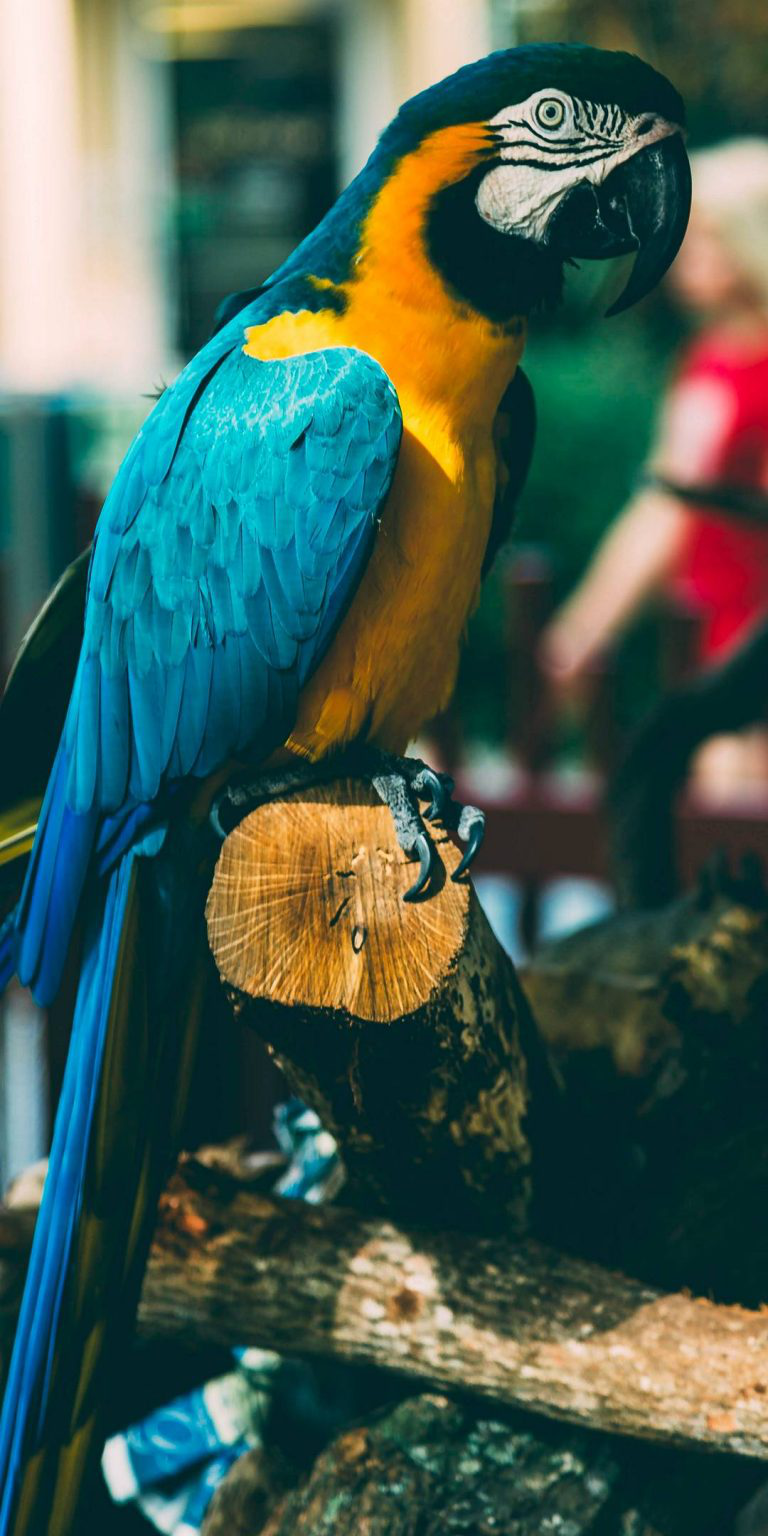

In [41]:
orig_image

In [44]:
print(array.shape)

(512, 512, 3)


In [42]:
x=array.shape[0]
y=array.shape[1]
red=init_matrix(x,y)
green=init_matrix(x,y)
blue=init_matrix(x,y)

In [7]:
# Separating the red, green & blue components of the picture
red_component=separate_components(x,y,0,array,red)
green_component=separate_components(x,y,1,array,green)
blue_component=separate_components(x,y,2,array,blue)

In [46]:
print(red_component.shape)

(512, 512)


In [8]:
red_component=list2array(red_component)
green_component=list2array(green_component)
blue_component=list2array(blue_component)

In [9]:
# Creating 8x8 blocks 
red_blocks=create_blocks(red_component)
green_blocks=create_blocks(green_component)
blue_blocks=create_blocks(blue_component)

In [10]:
H=transform_matrix()
print(H)

[[ 0.35355  0.35355  0.5      0.       0.70711  0.       0.       0.     ]
 [ 0.35355  0.35355  0.5      0.      -0.70711  0.       0.       0.     ]
 [ 0.35355  0.35355 -0.5      0.       0.       0.70711  0.       0.     ]
 [ 0.35355  0.35355 -0.5      0.       0.      -0.70711  0.       0.     ]
 [ 0.35355 -0.35355  0.       0.5      0.       0.       0.70711  0.     ]
 [ 0.35355 -0.35355  0.       0.5      0.       0.      -0.70711  0.     ]
 [ 0.35355 -0.35355  0.      -0.5      0.       0.       0.       0.70711]
 [ 0.35355 -0.35355  0.      -0.5      0.       0.       0.      -0.70711]]


In [11]:
# Initialising empty 8x8 matrices to store compressed components later
compressed_red=init_matrix(maxo,maxo)
compressed_green=init_matrix(maxo,maxo)
compressed_blue=init_matrix(maxo,maxo)

In [12]:
H_transpose=transpose(H)
for i in range(len(red_blocks)):
    for j in range(0,len(red_blocks)):
        compressed_red[i][j]=matrix_product(matrix_product(H_transpose,red_blocks[i][j]),H)
for i in range(len(green_blocks)):
    for j in range(0, len(green_blocks)):
        compressed_green[i][j]=matrix_product(matrix_product(H_transpose,green_blocks[i][j]),H)
for i in range(len(blue_blocks)):
    for j in range(0, len(blue_blocks)):
        compressed_blue[i][j]=matrix_product(matrix_product(H_transpose,blue_blocks[i][j]),H)


In [13]:
compressed_red=list2array(compressed_red)
compressed_green=list2array(compressed_green)
compressed_blue=list2array(compressed_blue)

In [14]:
components_red=compressed_red.transpose(0,2,1,3).reshape(dimension,dimension)
components_green=compressed_green.transpose(0,2,1,3).reshape(dimension,dimension)
components_blue=compressed_blue.transpose(0,2,1,3).reshape(dimension,dimension)

In [15]:
# Initialising 'compressed' list to store all the three compressed components in one matrix
compressed=[]
for i in range(0,x):
    compressed.append([])
    for j in range(0,y):
        compressed[i].append([])
        for k in range(0,3):
            compressed[i][j].append([])



In [16]:
for i in range(0,x):
    for j in range(0,y):
        compressed[i][j][0]=components_red[i][j]
        compressed[i][j][1]=components_green[i][j]
        compressed[i][j][2]=components_blue[i][j]

In [17]:
compressed=list2array(compressed)
compressed=compressed.astype(np.uint8)
print(compressed)

[[[224  68   4]
  [255 241 232]
  [  0 250 246]
  ...
  [254 255 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 254]
  [  0   0 253]
  [255   0 255]
  ...
  [  1   0   1]
  [  1   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  2   5  10]
  [  0 254 241]
  [  3 245 250]
  ...
  [  0   0   0]
  [  0   0 255]
  [  0   0   0]]

 [[  0   7  12]
  [  0   3   0]
  [255 250 242]
  ...
  [  0 255   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   6   9]
  [  1   3   2]
  [  1 252 247]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [18]:
image_compressed=Image.fromarray(compressed)

In [19]:
image_compressed=image_compressed.resize([orig_height,orig_width])

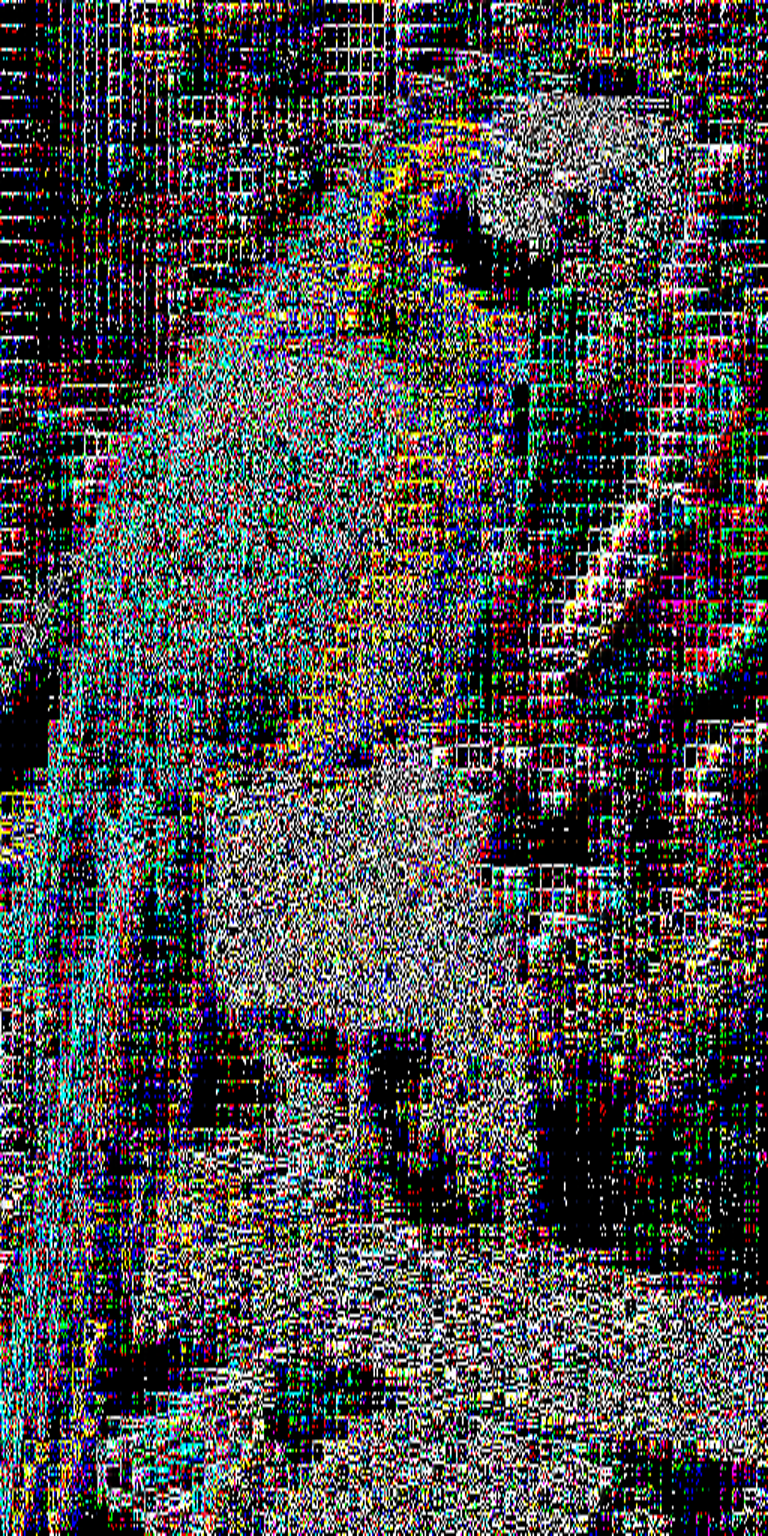

In [53]:
image_compressed

In [21]:
# Initialising three lists to store decompressed components
decompressed_red=init_matrix(maxo,maxo)
decompressed_green=init_matrix(maxo,maxo)
decompressed_blue=init_matrix(maxo,maxo)

In [22]:
for i in range(len(red_blocks)): 
    for j in range(len(red_blocks)):
        decompressed_red[i][j]=matrix_product(matrix_product(H,compressed_red[i][j]),H_transpose)
for i in range(len(green_blocks)): 
    for j in range(len(green_blocks)):
        decompressed_green[i][j]=matrix_product(matrix_product(H,compressed_green[i][j]),H_transpose)
for i in range(len(blue_blocks)): 
    for j in range(len(blue_blocks)):
        decompressed_blue[i][j]=matrix_product(matrix_product(H,compressed_blue[i][j]),H_transpose)

In [23]:
decompressed_red=list2array(decompressed_red)
decompressed_green=list2array(decompressed_green)
decompressed_blue=list2array(decompressed_blue)


In [24]:
red_components=decompressed_red.transpose(0,2,1,3).reshape(dimension,dimension)
green_components=decompressed_green.transpose(0,2,1,3).reshape(dimension,dimension)
blue_components=decompressed_blue.transpose(0,2,1,3).reshape(dimension,dimension)

In [25]:
# Initialising 'decompressed' list to store all the three components.
decompressed=[]
for i in range(0,x):
    decompressed.append([])
    for j in range(0,y):
        decompressed[i].append([])
        for k in range(0,3):
            decompressed[i][j].append([])


In [26]:
for i in range(0,x):
    for j in range(0,y):
        decompressed[i][j][0]=red_components[i][j]
        decompressed[i][j][1]=green_components[i][j]
        decompressed[i][j][2]=blue_components[i][j]

In [27]:
# 'decompressed' contains all the three colour components after decompression
decompressed=list2array(decompressed)

In [54]:
decompressed_image_array=decompressed.astype(np.uint8)
print(decompressed_image_array)

[[[250 228 217]
  [251 229 218]
  [250 230 221]
  ...
  [ 83  79  42]
  [ 83  81  44]
  [ 83  80  45]]

 [[250 228 217]
  [251 229 218]
  [250 230 221]
  ...
  [ 85  79  43]
  [ 84  80  43]
  [ 84  80  44]]

 [[250 228 217]
  [251 229 218]
  [250 230 221]
  ...
  [ 88  79  42]
  [ 86  79  43]
  [ 86  79  43]]

 ...

 [[  7 125 198]
  [  9 129 207]
  [  1 106 186]
  ...
  [ 32  53  48]
  [ 35  54  50]
  [ 37  56  52]]

 [[  7 126 205]
  [  8 122 204]
  [  0  95 171]
  ...
  [ 35  57  50]
  [ 37  58  51]
  [ 39  59  53]]

 [[  8 126 210]
  [  4 117 200]
  [  0  85 159]
  ...
  [ 38  61  52]
  [ 38  61  51]
  [ 39  62  52]]]


In [55]:
# Converting the decompressed matrix into image and resizing it to the original dimensions
decompressed_img=Image.fromarray(decompressed_image_array)
decompressed_img=decompressed_img.resize([orig_height,orig_width])

In [30]:
decompressed_img.save('decompressed.jpg')

In [31]:
compressed_size=return_size('decompressed.jpg')

In [32]:
print("ORIGINAL SIZE (KB) : ",float(original_size/1024))
print("COMPRESSED SIZE (KB) : ",float(compressed_size/1024))
ratio=float(original_size/1024)/float(compressed_size/1024)
print("COMPRESSION PERCENTAGE : ",100-(100/ratio))

ORIGINAL SIZE (KB) :  144.7490234375
COMPRESSED SIZE (KB) :  112.7265625
COMPRESSION PERCENTAGE :  22.122747481834807


In [33]:
from math import log10
def PSNR(original, compressed):
    diff=(original-compressed)
    mse=np.mean((original-compressed)**2)
    max_pixel=255
    psnr=20*log10(max_pixel/((mse)**(1/2)))
    return psnr
    

In [34]:
x=PSNR(array,decompressed_image_array)
print(x)

48.301031415811366


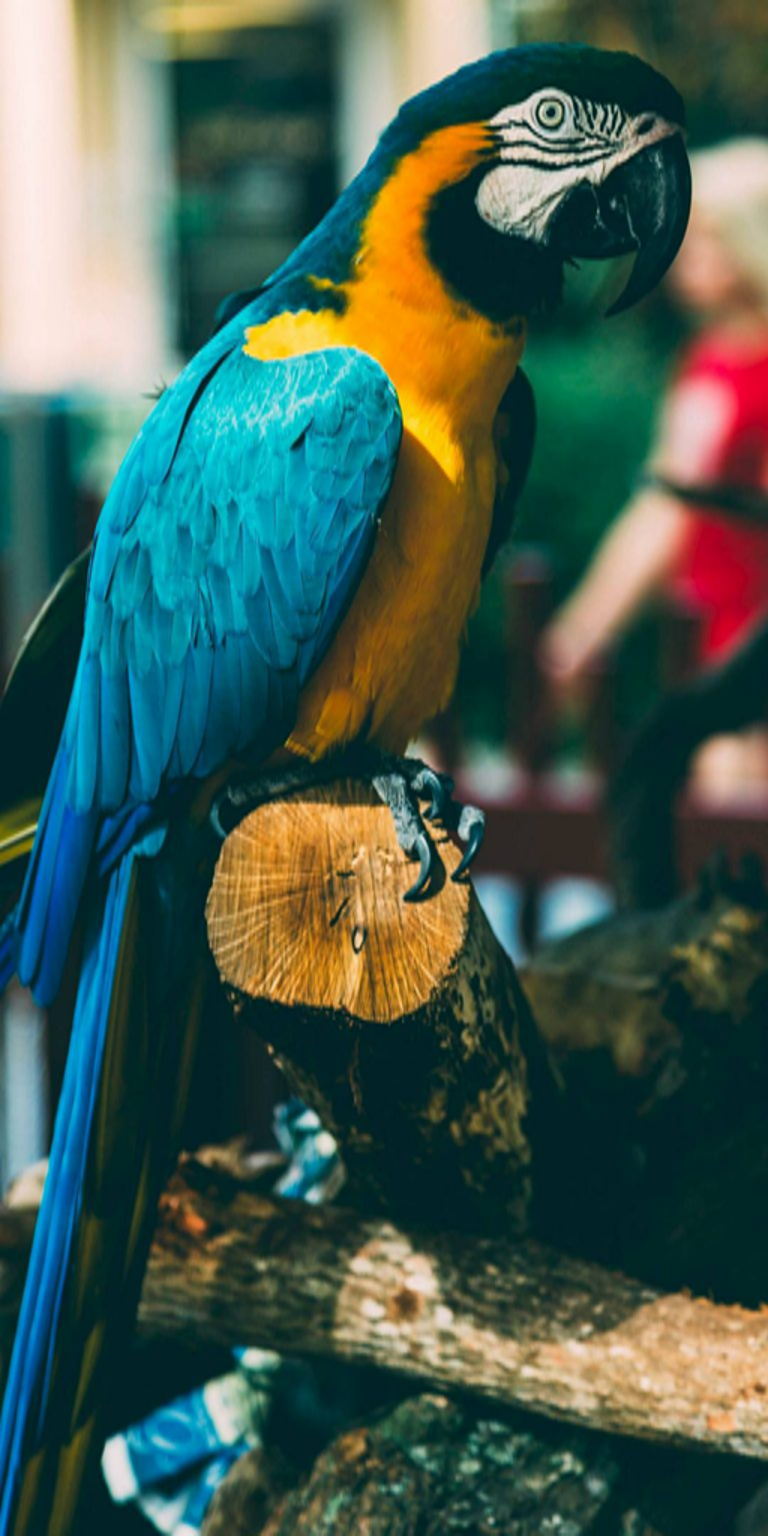

In [57]:
decompressed_img